Nœuds centraux : {'Woman8', 'Event8', 'Woman11', 'Event11', 'Woman4', 'Woman9', 'Event1', 'Event13', 'Woman0', 'Woman6', 'Woman10', 'Event6', 'Woman7', 'Event4', 'Event2', 'Woman2', 'Event5', 'Woman15', 'Woman3', 'Event7', 'Woman12', 'Event10', 'Event12', 'Woman5', 'Woman1', 'Event9', 'Event0', 'Woman16', 'Woman14', 'Woman17', 'Event3', 'Woman13'}
Nœuds périphériques : set()


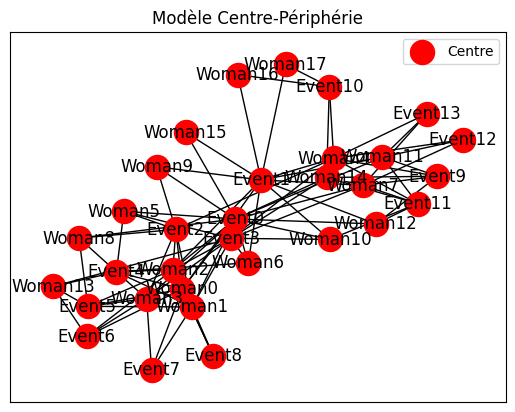

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from networkx.algorithms import core

# Jeu de données sur les femmes du Sud (nœuds: femmes et événements)
adj_matrix = np.array([
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
    [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
])

# Création du graphe bipartite
B = nx.Graph()

# Ajout des nœuds pour les femmes et les événements
women = ["Woman" + str(i) for i in range(18)]
events = ["Event" + str(i) for i in range(14)]

B.add_nodes_from(women, bipartite=0)
B.add_nodes_from(events, bipartite=1)

# Ajout des arêtes selon la matrice d'adjacence
edges = [(women[i], events[j]) for i in range(len(women)) for j in range(len(events)) if adj_matrix[i, j] == 1]
B.add_edges_from(edges)

# Vérification des composants bipartites
assert bipartite.is_bipartite(B)

# Calcul du core number pour chaque nœud
core_numbers = core.core_number(B)

# Définition des nœuds centraux et périphériques
center = {node for node, cn in core_numbers.items() if cn > 1}
periphery = set(B.nodes) - center

# Affichage des résultats
print("Nœuds centraux :", center)
print("Nœuds périphériques :", periphery)

# Visualisation du réseau avec les nœuds centraux et périphériques
pos = nx.spring_layout(B)
nx.draw_networkx_nodes(B, pos, nodelist=center, node_color='r', label='Centre')
nx.draw_networkx_nodes(B, pos, nodelist=periphery, node_color='b', label='Périphérie')
nx.draw_networkx_edges(B, pos)
nx.draw_networkx_labels(B, pos)
plt.legend(scatterpoints=1)
plt.title("Modèle Centre-Périphérie")
plt.show()
